# Part II - (Ford GoBike System Data)
## by (Nimatallahi Masuud)

## Investigation Overview


> The goal is to determine the relationship between trip duration and bike share for all trips and other explanatory variables in the dataset

 


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area..

In [24]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")



In [25]:
# load in the dataset into a pandas dataframe
df_bike = pd.read_csv("bike_dataset.csv")

>    

## (1. What is the distribution of Member Gender Visualization 1)

>The bulk of members are males which represent 74.69 % From the total trips while female members account for 23.26% of all users and other gender represent 2.08%.
> Since Males represent around 74.69 % of the total trips this gives more indication about females not prefering bikes as go to for workouts.


In [26]:
#creating a function which diffrent univariate plots
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))

    if ordered:
        g = sb.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Blues_r')
    else:
        g = sb.countplot(df[feature], palette='Blues')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

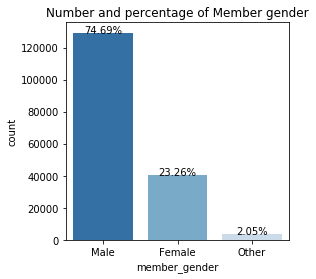

In [27]:
#ploting the number and percentage of member gender
plot_count("member_gender", "Member gender", df_bike,1);

## (2. What is the distribution of User Types)

> Subscribers trips represent 90.93 % From the total trips while customer trips represent 9.07%. this shows that majority of members(user_type) are subscribers


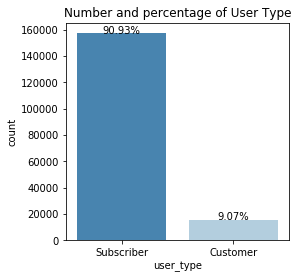

In [28]:
#ploting the number and percentage of user type
plot_count("user_type", "User Type", df_bike,1);

## (3. What is the distribution of bike shared for all trips)

>Users who doesn't share bike represent 90.19 % From the total trips while 9.81% represent users who share bike.

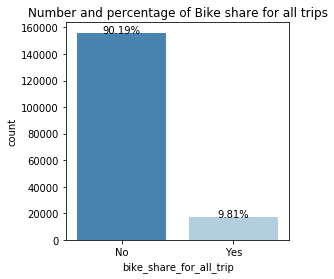

In [29]:
##ploting the number and percentage bike share for all trips
plot_count("bike_share_for_all_trip", "Bike share for all trips", df_bike,1);


## ( 4. What is the trip distribution over weekdays)
>The distribution of both Start and End of Day of week shows that the demand for trips gradually increases from its highest levels on Thursday it then declines untill reaching its lowest levels on Saturday and Sunday. This is due to the fact that Saturday and Sunday are the weekend in the United States of America.

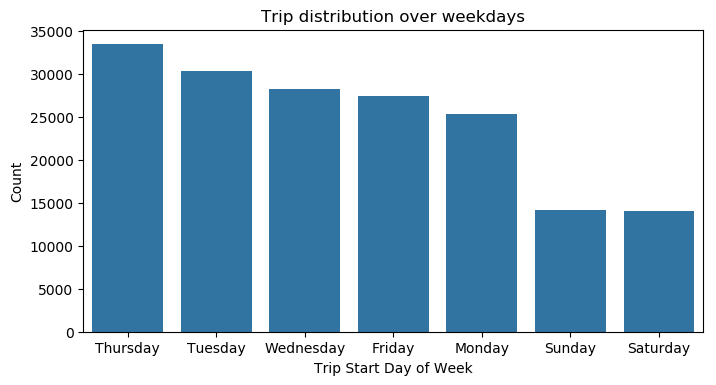

In [30]:
# trip distribution over weekdays
plt.figure(figsize = (8,4), dpi = 100)
color = sb.color_palette()[0]
order = df_bike['start_day_of_week'].value_counts().index
sb.countplot(data=df_bike, x='start_day_of_week', color=color, order=order)
plt.xlabel('Trip Start Day of Week')
plt.ylabel('Count')
plt.title("Trip distribution over weekdays")

plt.show()

## ( 4. Relationship Between Bike Share For All Trip By User Type)

>The results belove demonstrate that only subscribers shared bikes, and no customers ever shared a bike for the entirety of a trip. Also subscribers have the highest number of no sharing of bike
>and since Most Users are subscribers this shows that people will be more likely to engage in the service on consistent basis and subscribe.

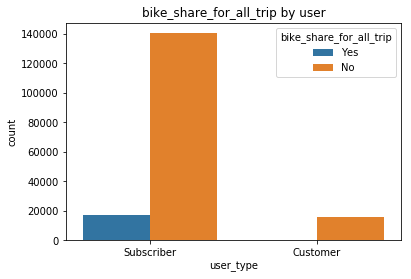

In [31]:
#a function that shows the relationship between bike share for all trip by user type
def cp(data, x):
    ax=sns.countplot(x='user_type', hue='bike_share_for_all_trip', data=data)
    ax.set_title(f"bike_share_for_all_trip by {x}")
    plt.show()
    df_bike.groupby('user_type')["bike_share_for_all_trip"].value_counts().unstack()
    
    
cp(df_bike, 'user')

## ( 5. What Is The Most Common Days Of Week For Sharing Bike)

>The below Visual shows that Thursday, Tuesday and wednesday are the most common day of the week where majority are subcribers while there is no or little significant difference in days of the week by customers.
>Most trips fall in Thursday,Tuesday,Friday and this indicate that people use bike trips mostly for work and school.

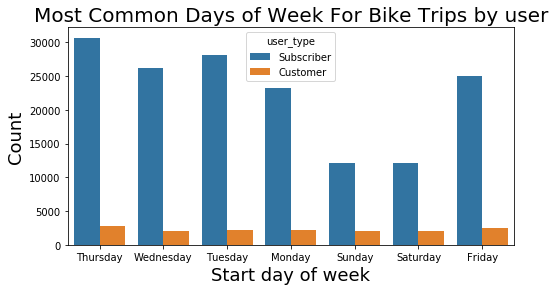

In [32]:
#plot showing the most common days of week for bike trip by user.
plt.figure(figsize = (8,4))
sns.countplot(data=df_bike, x=df_bike['start_day_of_week'], hue='user_type')
plt.title('Most Common Days of Week For Bike Trips by user', fontsize=20)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Start day of week', fontsize=18); 

## ( 6. What is the relationship between start day of week against duration in minute with respect to user type.)

>There are way more Customers than Subcribers. Subscribers usage seem to be very consistent and their usage is intended for daily routine and there is little or no significant changes between the weekdays and weekends.Customers on the other hand tend to use bikes for fun, their usage is concentrated during weekends.

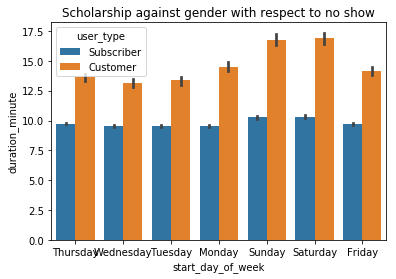

In [33]:
#plotting having Start day of week against duration minute with respect user type
sns.barplot(x = 'start_day_of_week', y = 'duration_minute', hue = 'user_type', data = df_bike)
plt.title('Scholarship against gender with respect to no show')
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_Ford_GoBike_System_Data.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_Ford_GoBike_System_Data.ipynb to slides
[NbConvertApp] Writing 413607 bytes to Part_II_slide_deck_Ford_GoBike_System_Data.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_Ford_GoBike_System_Data.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
